# Machine learning voor dijkprofiel analyse

## Probleem definitie

Bij het automatiseren van dijktoetsingen worden dwarsprofielen als invoer gegeven. Deze data kan op diverse manieren ingewonnen (drones, landmeten, AHN, etc). Om een dwarsprofiel ook daadwerkelijk te kunnen berekenen zijn er karakteristieke punten nodig. In de onderstaande afbeelding staat een voorbeeld van de definitie van de karakteristieke punten die bv. binnen de Dijk Analyse Module van Deltares gebruikt worden.

...oss deltares ligt plat.. even wachten voor de afbeelding dus..

Het bepalen van deze punten is een handmatig proces waarbij met zogenaamde kliktools de punten door de gebruiker gedefineerd worden. Dit is ondanks de goede beschikbare software ( https://www.twisq.nl/site/dijkbeoordeling/ ) een arbeidsintensief proces. 

In dit notebook wordt een aanzet gemaakt om door waterschappen beschikbaar gestelde data bestaande uit 'geklikte' punten data te genereren die kan dienen als input voor machine learning technieken om te bepalen of deze techniek geschikt is om dit werk te automatiseren.

## Uitgangspunten

In dit notebook wordt uitgegaan van de volgende mogelijke karakteristieke punten (ID - naam). De **vet** gedrukte punten zijn verplicht, de overige optioneel.

* **0 - maaiveld binnenwaarts**
* 1 - insteek sloot polderzijde
* 2 - slootbodem polderzijde
* 3 - slootbodem dijkzijde
* 4 - insteek sloot dijkzijde
* **5 - teen dijk binnenwaarts**
* 6 - kruin binnenberm
* 7 - insteek binnenberm
* **8 - kruin binnentalud**
* **9 - verkeersbelasting kant binnenwaarts**
* **10 - verkeersbelasting kant buitenwaarts**
* **11 - kruin buitentalud**
* 12 - insteek buitenberm
* 13 - kruin buitenberm
* **14 - teen dijk buitenwaarts**
* 15 - insteek geul
* 16 - teen geul
* **17 - maaiveld buitenwaarts**

## Tools.py

Er is een bestand tools.py dat helpt om de data in te lezen. De beschikbare functie zijn

##### get_all_surfacelines(waterschap)

Geeft een dictionary met alle beschikbare dwarsprofielen. Het resultaat is een dictionary met tuples met de volgende inhoud;

{id: [(cid0, x0, z0), (cid1, x1, z1), ... (cidn, xn, zn)]}

* id is het id van het dwarsprofiel (vaak dijk(ring)nummer en metrering o.i.d.)
* cid0 is de id van het punt x0, z0
* x0 is de x-coordinaat (lengte)
* z0 is de z-coordinaat (hoogte)

Omdat bij een dwarsprofiel (surfaceline) nog geen enkel punt bekend is staan alle cid op -1 (ongedefinieerd).

**Deze data kan als de input X voor het model gebruikt worden.**

Let op dat de parameter waterschap mee moet worden gegeven omdat helaas gebleken is dat niet iedereen de invoer bestanden hetzelfde behandelt. (Tot op heden is de enige optie 'rijnland').

##### get_all_cpoints(waterschap)

Geef een dictionary met alle geklikte profielen. Het resultaat is een dictionary met tuples met de volgende inhoud;

{id, [(0, x0, z0), (1, x1, z1),... (17, x17, z17)]}

* id is het id van het dwarsprofiel ((als het goed is) gelijk aan id van de surfaceline)
* 0, 1, ..., 17 is id van het karakteristieke punt
* xn is de x coordinaat van het nde karakteristieke punt
* zn is de z coordinaat van het nde karakteristieke punt

Let op dat xn en z1 -1 kunnen zijn wat inhoudt dat dit punt niet gedefinieerd is.

**Deze data kan als de output y voor de model training gebruikt worden.**

Let op dat de parameter waterschap mee moet worden gegeven omdat helaas gebleken is dat niet iedereen de invoer bestanden hetzelfde behandelt. (Tot op heden is de enige optie 'rijnland').

## Voorbeeld

In de onderstaande code halen we gegevens op en tonen we een profiel zonder en met karakteristieke punten;

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import tools

We lezen de data in;

In [2]:
all_slines = tools.get_all_surfacelines("rijnland")
all_cpoints = tools.get_all_cpoints("rijnland")

We gaan het eerste profiel in de all_cpoints lijst laden;

In [3]:
pid = list(all_cpoints.keys())[0]
surfaceline = all_slines[pid]
cpoints = all_cpoints[pid]

print("Profiel", pid)
print("Heeft als surfaceline:")
print(surfaceline)
print("En als karakteristieke punten:")
print(cpoints)

Profiel 009_042_00003
Heeft als surfaceline:
[(-1, 0.0, -4.2), (-1, 16.02, -4.2), (-1, 18.642, -3.061), (-1, 20.887, -2.086), (-1, 21.2, -1.95), (-1, 22.487, -1.391), (-1, 23.189, -1.086), (-1, 24.4, -0.56), (-1, 24.9, -0.45), (-1, 25.4, -0.27), (-1, 25.9, -0.23), (-1, 26.4, -0.25), (-1, 26.9, -0.28), (-1, 27.4, -0.3), (-1, 27.9, -0.4), (-1, 28.4, -0.56), (-1, 28.9, -0.71), (-1, 29.4, -0.97), (-1, 29.6, -1.086), (-1, 29.9, -1.26), (-1, 30.4, -1.26), (-1, 30.634, -1.391), (-1, 30.9, -1.54), (-1, 31.4, -1.78), (-1, 31.605, -1.882), (-1, 32.017, -2.086), (-1, 32.59, -2.37), (-1, 34.088, -2.37), (-1, 34.653, -2.086), (-1, 35.4, -1.71), (-1, 35.9, -1.66), (-1, 36.4, -1.5), (-1, 36.9, -1.5), (-1, 37.4, -1.38), (-1, 37.9, -1.28), (-1, 38.4, -1.28), (-1, 38.9, -1.31), (-1, 39.4, -1.27), (-1, 39.9, -1.27), (-1, 40.4, -1.31), (-1, 40.9, -1.33), (-1, 41.4, -1.28), (-1, 41.9, -1.23)]
En als karakteristieke punten:
[(0, 41.9, -1.23), (1, 35.4, -1.71), (2, 34.088, -2.37), (3, 32.59, -2.37), (4, 31.4

Grafisch werkt een stuk beter.. 

NB. de definitie van een onbekend karakteristiek punt is in DAM wellicht niet zo handig gekozen omdat er een punt (-1,-1,-1) gebruikt wordt. Zodra waterschappen (zoals Rijnland) dit naar 2D punten vertalen wordt de check dus op punt (-1,-1) wat best wel eens een echt punt op het dwarsprofiel zou kunnen zijn. Let wel dat dit voorkomen wordt als alle profielen op 0 beginnen!

[-1.23, -1.71, -2.37, -2.37, -1.78, -1.54, -1.26, -1.26, -0.4, -0.28, -0.56, -0.27, -4.2, -4.2]


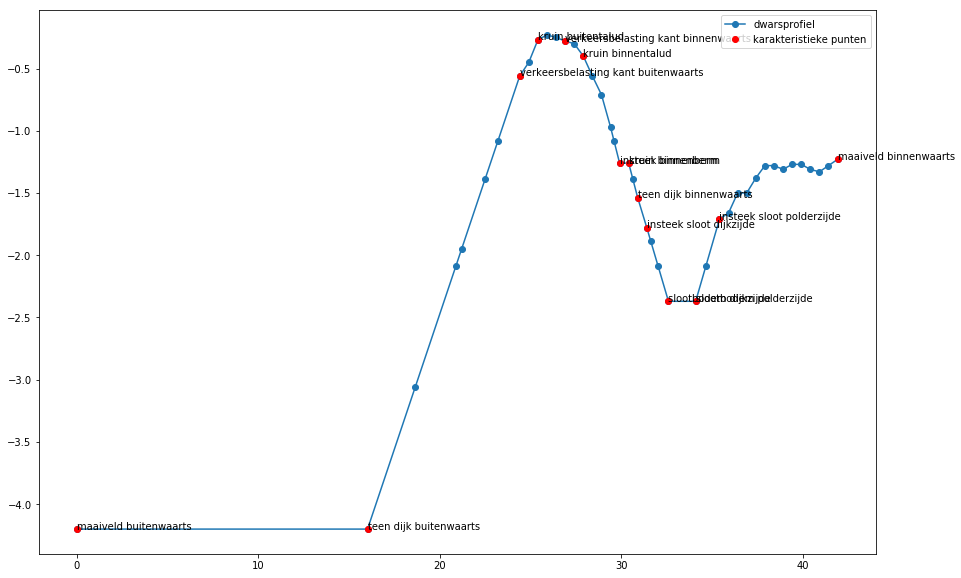

In [4]:
x = [p[1] for p in surfaceline]
z = [p[2] for p in surfaceline]
cx = [p[1] for p in cpoints if p[1]!=-1.0 and p[2]!=-1.0] #toon enkel de punten die gedefinieerd zijn
cy = [p[2] for p in cpoints if p[1]!=-1.0 and p[2]!=-1.0]
ctext = [tools.CPOINT_NAMES[p[0]] for p in cpoints if p[1]!=-1.0 and p[2]!=-1.0] #labels van de punten ophalen

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(x,z,'-o', label='dwarsprofiel')
ax.plot(cx, cy, 'or', label='karakteristieke punten')
print(cy)
for i, txt in enumerate(zip(cy,ctext)):
    ax.annotate(ctext[i], (cx[i], cy[i])) #plot t label bij het punt
_ = ax.legend() #_= om de matplotlib tekst uitvoer te onderdrukken

De blauwe lijn is de input oftewel de lijn met ongedefineerde punten. De rode punten is de output, **let op dat deze punten altijd onderdeel moeten zijn van de blauwe lijn.**

Het doel van het te maken model is om de rode punten te voorspellen

In [5]:
import math

In [25]:
p1 = (0,0)
p2 = (1,-0.00001)

dx = (p2[0] - p1[0])
dy = (p2[1] - p1[1])

print(dx, dy)

1 -1e-05


In [26]:
print(math.atan2(dy, dx) * (180./math.pi)) 

-0.0005729577951117247
